In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
import yaml
import pandas as pd

from utils.data import *
from algorithms import load_model

In [5]:
fore_date = pd.to_datetime('2020-11-02')
n_fore = 14
start_date = fore_date + pd.Timedelta(days=1)
end_date = fore_date + pd.Timedelta(days=n_fore)

In [6]:
with open('./experiments/lightgbm0.yaml', 'r') as f:
    config = yaml.load(f, Loader=yaml.Loader)
config["data"]

{'ips_file': './data/OxCGRT_latest.csv',
 'nb_lookback_days': 1,
 'y': 'NewCasesRM'}

In [7]:
model = load_model(config)

In [8]:
%%time 
data = Data(config)

/home/schapke/miniconda2/envs/xprize/lib/python3.7/site-packages/IPython/core/magic.py:188: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


Warning! Interpolating missing ConfirmedCases statistics. (This will affect the ground truth labels NewCases).
CPU times: user 5.59 s, sys: 194 ms, total: 5.78 s
Wall time: 5.8 s


In [12]:
%%time
n_fore = 15
fore_date = pd.to_datetime("2020-10-01")
iterable = data.build_test_iter(fore_date, n_fore)

sample = iterable()
for i in range(n_fore): 
    sample = iterable(model.predict(sample))
print("done!")

(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)


/home/schapke/projects/xprize/pandemic_response/work/utils/data.py:180: RuntimeWarning: divide by zero encountered in true_divide
  df.loc[date, "NewCasesRMGrowth"] = forecast / prev_new_cases


(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
(236,)
done!
CPU times: user 1.62 s, sys: 128 ms, total: 1.75 s
Wall time: 933 ms


In [13]:
regions = sample.index
fore_dates = pd.date_range(fore_date, periods=n_fore, freq='1d')
forecast0 = iterable(test=False)
labels0 = data.df.loc[fore_dates].NewCasesRM

labels = labels0.unstack(0)
forecast = forecast0.unstack(0)

forecast.head()

Date,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15
GeoID,,,,,,,,,,,,,,,
Afghanistan__nan,28.285714,27.503005,27.789793,31.595535,29.424631,34.359732,31.478214,36.694974,32.962876,40.580510,32.176433,43.870240,32.409902,47.658796,32.155080
Albania__nan,130.928571,127.492192,128.084296,141.254505,138.921190,145.407312,145.664782,191.246056,191.017986,208.942914,206.491784,214.947214,212.170704,222.630872,220.528693
Algeria__nan,183.142857,187.208031,180.900396,213.761702,205.585618,222.389053,213.382289,229.861204,219.213802,237.523544,228.785524,245.356709,233.981533,246.173166,242.313717
Andorra__nan,43.714286,37.774689,44.384617,43.039252,46.950227,47.047873,51.625684,51.610237,57.738736,57.616154,60.842396,61.307235,63.186008,64.076394,66.262502
Angola__nan,100.214286,109.919461,98.800552,123.108038,108.580685,129.764543,113.144823,138.810908,119.513016,145.755485,129.647836,190.922948,139.090132,211.703581,145.583686


In [14]:
labels.head()

Date,2020-10-01,2020-10-02,2020-10-03,2020-10-04,2020-10-05,2020-10-06,2020-10-07,2020-10-08,2020-10-09,2020-10-10,2020-10-11,2020-10-12,2020-10-13,2020-10-14,2020-10-15
GeoID,,,,,,,,,,,,,,,
Afghanistan__nan,28.285714,29.500000,26.500000,18.071429,21.214286,29.428571,28.785714,31.857143,36.214286,36.500000,34.000000,40.857143,49.214286,52.857143,54.142857
Albania__nan,130.928571,132.714286,135.142857,135.071429,134.357143,133.928571,135.857143,138.785714,141.285714,144.357143,148.428571,152.857143,155.642857,159.571429,164.714286
Algeria__nan,183.142857,178.285714,173.857143,169.428571,165.000000,160.500000,156.071429,151.428571,148.500000,146.428571,144.714286,143.214286,143.714286,145.071429,146.714286
Andorra__nan,43.714286,40.500000,39.000000,39.000000,39.000000,49.214286,49.214286,58.214286,58.214286,61.428571,61.428571,61.428571,73.500000,73.500000,81.428571
Angola__nan,100.214286,87.357143,94.642857,93.571429,98.500000,89.500000,106.357143,106.357143,107.142857,105.928571,102.928571,112.428571,112.071429,113.071429,122.000000


In [15]:
mae = (labels - forecast).values.mean()
maes = (labels - forecast).values.mean(1)
mae

133.47527797824077

In [23]:
#i = 218
#i = maes.argmax()
i = maes.argsort()[-1]
region = regions[i]
series = data.df.reorder_levels([1,0]).loc[region] 

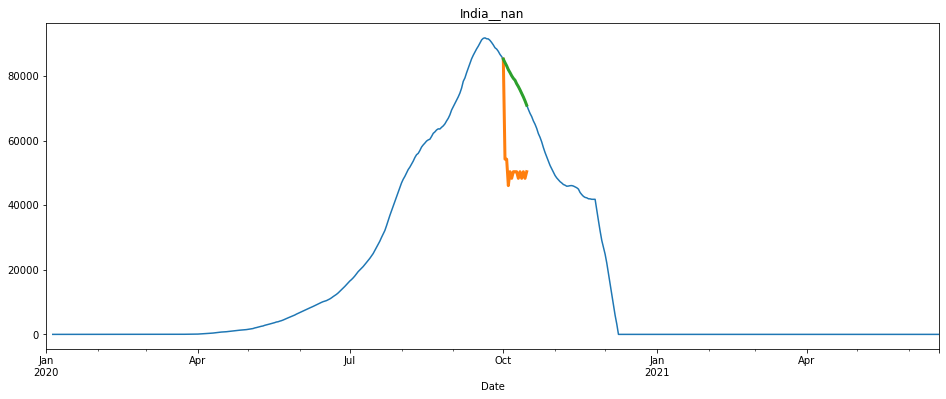

In [24]:
ax = series.NewCasesRM.plot(figsize=(16, 6), title=region)
ax = forecast.loc[region].plot(ax=ax, linewidth=3)
ax = series.loc[fore_dates].NewCasesRM.plot(ax=ax, linewidth=3)

# ######################################
# Global Average

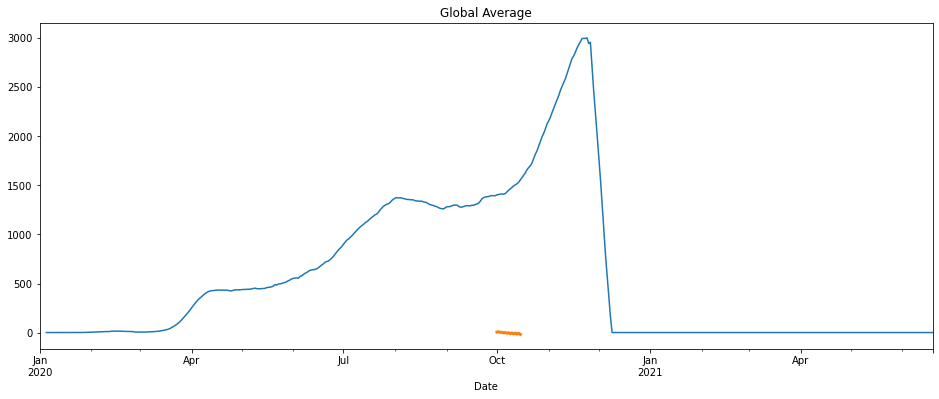

In [319]:
ax = data.df.reset_index().groupby("Date").mean().NewCasesRM.plot(figsize=(16, 6), title="Global Average")
ax = forecasts.mean(0).plot(ax=ax, linewidth=3)